In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
sns.set_theme(style="darkgrid")

In [2]:
def elnino(value):
    if value <= -0.5:
        return 'La Nina'
    elif value >= 0.5:
        return 'El Nino'
    else:
        return 'Neutral'

In [3]:
hurricanes = pd.read_csv('AtlanticHurricane.csv',
                        sep='\t')
enso = pd.read_csv('ENSO.csv',
                   sep='\t')
enso["Hurricanes"] = hurricanes["Hurricanes"]
hurricanes['ENSO'] = enso['SON'].iloc[:-1].apply(elnino)

In [4]:
def toTimePoint(value):
    a = {
        "DJF": 1,
        "JFM": 2,
        "FMA": 3,
        "MAM": 4,
        "AMJ": 5,
        "MJJ": 6,
        "JJA": 7,
        "JAS": 8,
        "ASO": 9,
        "SON": 10,
        "OND": 11,
        "NDJ": 12
    }
    return a[value]

melted = pd.melt(enso.iloc[:-1, :14], id_vars=["Year", "Hurricanes"])
melted["variable"] = melted["variable"].apply(toTimePoint)
melted

,Year,Hurricanes,variable,value
0,1950,6.0,1,-1.5
1,1951,3.0,1,-0.8
2,1952,2.0,1,0.5
3,1953,3.0,1,0.4
4,1954,3.0,1,0.8
...,...,...,...,...
847,2016,4.0,12,-0.6
848,2017,6.0,12,-1.0
849,2018,2.0,12,0.8
850,2019,3.0,12,0.5


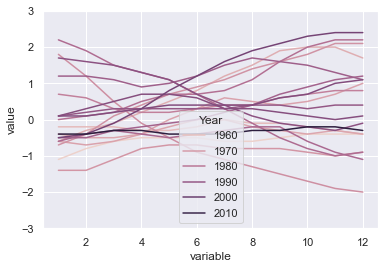

In [5]:
sns.lineplot(data=melted[melted["Hurricanes"] <= 1.0], x="variable", y="value", hue="Year")
plt.ylim(-3, 3)
plt.show()

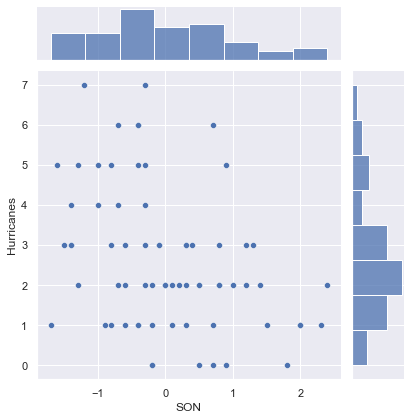

In [6]:
sns.jointplot(data=enso, x="SON", y="Hurricanes")

In [7]:
elnino = enso.iloc[:, 1:13].values.reshape(864,)
mod = sm.tsa.arima.ARIMA(elnino[:-6], order=(0, 1, 11))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  858
Model:                ARIMA(0, 1, 11)   Log Likelihood                 585.556
Date:                Mon, 16 Aug 2021   AIC                          -1147.113
Time:                        08:57:52   BIC                          -1090.071
Sample:                             0   HQIC                         -1125.271
                                - 858                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8683      0.036     24.286      0.000       0.798       0.938
ma.L2          0.6692      0.043     15.409      0.000       0.584       0.754
ma.L3          0.2009      0.049      4.072      0.000       0.104       0.298
ma.L4          0.0517      0.049      1.050      0.294      -0.045       0.148
ma.L5          0.0380      0.049      0.775      0.438      -0.058       0.134
ma.L6          0.0306      0.048      0.640      0.522      -0.063       0.124
ma.L7         -0.1117      0.050     -2.252      0.024      -0.209      -0.014
ma.L8         -0.1424      0.050     -2.870      0.004      -0.240      -0.045
ma.L9         -0.2220      0.052     -4.263      0.000      -0.324      -0.120
ma.L10        -0.2184      0.046     -4.705      0.000      -0.309      -0.127
ma.L11        -0.1861      0.034     -5.481      0.000      -0.253      -0.120
sigma2         0.0149      0.001     19.688      0.000       0.013       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):                 1.53
Prob(Q):                              0.42   Prob(JB):                         0.47
Heteroskedasticity (H):               0.88   Skew:                            -0.07
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(-2.0, 2.0)

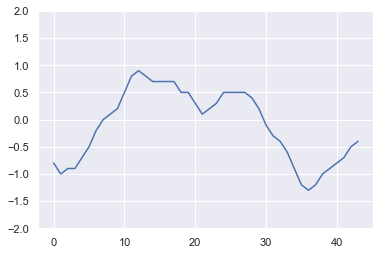

In [8]:
sns.lineplot(data=elnino[-50:])
plt.ylim(-2,2)

In [9]:
fcast_res1 = res.get_forecast(steps=4)
frame = fcast_res1.summary_frame(alpha=0.10)
frame.iloc[-1]

y
mean            -0.413539
mean_se          0.524021
mean_ci_lower   -1.275477
mean_ci_upper    0.448400
Name: 3, dtype: float64

In [10]:
params = frame.iloc[-1]
N = 1000000
dist = np.random.normal(params["mean"], params["mean_se"], size = N)
bins = [-0.5, 0.5]
digit = np.digitize(dist, bins)
np.bincount(digit)/N

array([0.434462, 0.524911, 0.040627])

In [11]:
print("total mean", hurricanes['Hurricanes'].mean())
print("total std", hurricanes['Hurricanes'].std(), "\n")

print("neutral mean", hurricanes[hurricanes['ENSO'] == 'Neutral']['Hurricanes'].mean())
print("neutral std", hurricanes[hurricanes['ENSO'] == 'Neutral']['Hurricanes'].std(), "\n")

print("el nino mean", hurricanes[hurricanes['ENSO'] == 'El Nino']['Hurricanes'].mean())
print("el nino std", hurricanes[hurricanes['ENSO'] == 'El Nino']['Hurricanes'].std(), "\n")

print("la nina mean", hurricanes[hurricanes['ENSO'] == 'La Nina']['Hurricanes'].mean())
print("la nina std", hurricanes[hurricanes['ENSO'] == 'La Nina']['Hurricanes'].std())

total mean 2.6056338028169015
total std 1.7686061762984564 

neutral mean 2.6923076923076925
neutral std 1.849740106484817 

el nino mean 1.875
el nino std 1.4540049638094805 

la nina mean 3.3333333333333335
la nina std 1.7416467303484175


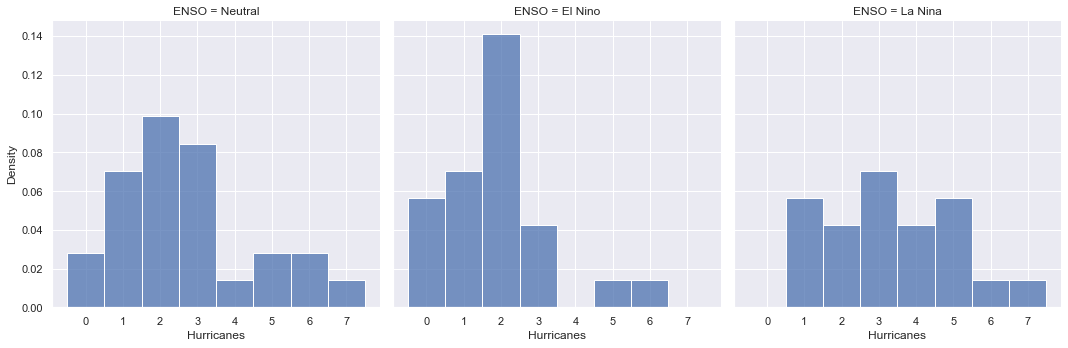

In [12]:
sns.displot(hurricanes, x="Hurricanes", col='ENSO', multiple="dodge", stat="density", discrete=True)

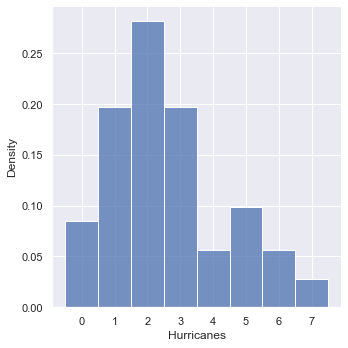

In [15]:
sns.displot(hurricanes, x="Hurricanes", stat="density", discrete=True)
plt.xticks([0,1,2,3,4,5,6,7])
plt.show()

In [16]:
N = 1000000
laNinaProb = 0.434462
neutralProb = 0.524911
elNinoProb = 0.040627
mySamples = np.concatenate((np.random.poisson(3.263157894736842, size = round(N*laNinaProb)),
                      np.random.poisson(2.6451612903225805, size = round(N*neutralProb)),
                      np.random.poisson(1.9523809523809523, size = round(N*elNinoProb))))

In [17]:
N = 1000000
laNinaProb = 0.62
neutralProb = 0.37
elNinoProb = 0.01
iriSamples = np.concatenate((np.random.poisson(3.263157894736842, size = round(N*laNinaProb)),
                      np.random.poisson(2.6451612903225805, size = round(N*neutralProb)),
                      np.random.poisson(1.9523809523809523, size = round(N*elNinoProb))))

In [18]:
samples = pd.DataFrame({"IRI": iriSamples, "My Prediction": mySamples}).melt()

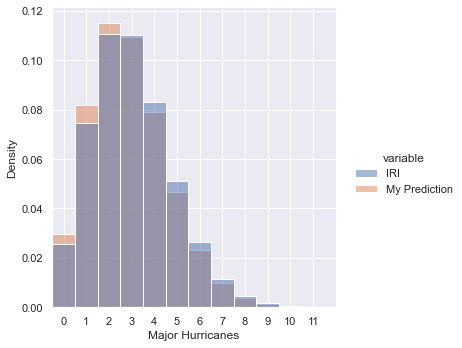

In [19]:
sns.displot(samples, x='value', hue="variable", stat="density", discrete = True)
plt.xticks([i for i in range(12)])
plt.xlim(-0.5, 12)
plt.xlabel("Major Hurricanes")
plt.show()

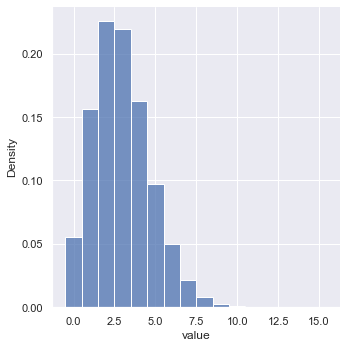

In [20]:
sns.displot(samples, x='value', stat="density", discrete = True)
plt.show()

In [21]:
for i, j in enumerate(100*(np.bincount(samples["value"])/(2*N))):
    if round(j, 1) > 0.0:
        print(i, "{}%".format(round(j, 1)))

0 5.5%
1 15.7%
2 22.6%
3 21.9%
4 16.2%
5 9.7%
6 5.0%
7 2.1%
8 0.8%
9 0.3%
10 0.1%


In [ ]:
df